**Kelompok Teh Pucuk**
1. Tiara Valentina (23083010091)
2. Sefilah Naurah  (23083010105) 

**Regression Analysis on Bank Dataset**

**Membaca Data**

In [18]:
import pandas as pd
data_raw = pd.read_csv("C:\\Users\ASUS\\Downloads\\bank.csv", sep=';')
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Kode: Dataset dibaca menggunakan pandas dan disimpan dalam variabel data_raw. File dataset berisi data pelanggan bank untuk analisis perilaku berlangganan deposito.
Tujuan: Memuat dataset untuk dianalisis lebih lanjut.
Hasil: Data mentah dimuat ke dalam DataFrame.

**Mengonversi Tipe Data Numerik**

In [21]:
# Mengonversi kolom numerik ke tipe data yang sesuai
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
data_split[numerical_columns] = data_raw[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Menampilkan informasi tipe data
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


Konteks: Kolom numerik dipastikan memiliki tipe data numerik untuk mencegah error dalam analisis.
Tujuan: Menormalkan tipe data dan menangani nilai tak valid (errors='coerce' mengganti nilai tidak valid menjadi NaN).
Hasil: Semua kolom numerik terkonversi dengan benar.

**Menangani Nilai yang Hilang (Missing Values)**

In [24]:
# Memeriksa nilai yang hilang
print(data_raw.isnull().sum())

# Menghapus baris dengan nilai yang hilang
data_cleaned = data_raw.dropna()

# Menampilkan data setelah menghapus nilai hilang
print(data_cleaned.info())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 

Kode: Mengecek jumlah nilai yang hilang, kemudian menghapus baris dengan nilai hilang.
Tujuan: Menghilangkan potensi masalah analisis akibat data yang tidak lengkap.
Hasil: Dataset bersih tanpa nilai yang hilang.


**Menstandarisasi Format Teks**

In [28]:
# Standarisasi teks menjadi huruf kecil dan menghapus spasi tambahan
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].str.lower().str.strip()

# Menampilkan beberapa baris setelah standarisasi
print(data_cleaned.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


Kode: Kolom kategorikal disesuaikan menjadi huruf kecil dan spasi tambahan dihapus.
Tujuan: Mencegah inkonsistensi akibat perbedaan format teks (contoh: Yes dan yes dianggap sama).
Hasil: Data kategorikal bersih dan seragam.


**Memeriksa dan Menghapus Duplikasi**

In [31]:
# Memeriksa jumlah duplikasi
print(data_cleaned.duplicated().sum())

# Menghapus duplikasi
data_cleaned = data_cleaned.drop_duplicates()

# Menampilkan data setelah menghapus duplikasi
print(data_cleaned.shape)

0
(4521, 17)


Kode: Baris duplikasi dihapus.
Tujuan: Menghindari bias dalam analisis akibat pengulangan data.
Hasil: Dataset tanpa duplikasi.

**Validasi Data**

In [32]:
# Validasi nilai dalam kolom tertentu
print(data_cleaned["age"].min(), data_cleaned["age"].max())  # Validasi range usia
print(data_cleaned["job"].unique())  # Validasi kategori pekerjaan

19 87
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


Kode: Mengecek range data numerik dan kategori data kategorikal.
Tujuan: Memastikan data sesuai dengan ekspektasi domain bisnis.
Hasil: Data sesuai untuk dianalisis.

**Menyimpan Data yang Sudah Bersih**

In [33]:
# Menyimpan data ke file CSV baru
data_cleaned.to_csv('bank_cleaned.csv', index=False)

**Mengimpor Library yang Diperlukan**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk model regresi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# Untuk uji statistik
import statsmodels.api as sm
from scipy import stats

**Analisis Regresi Linier**

1. Memilih Variabel

Regresi linier memerlukan variabel independen (X) dan variabel dependen (y). 
Misalnya:
Variabel Dependen (y): balance (saldo bank). 
Variabel Independen (X): age, duration, dan campaign.

2. Membagi Data

In [40]:
from sklearn.model_selection import train_test_split

# Memilih variabel
X = data_cleaned[['age', 'duration', 'campaign']]
y = data_cleaned['balance']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3616, 3) (905, 3) (3616,) (905,)


Kode: Data dibagi menjadi training (80%) dan testing (20%).
Tujuan: Memastikan evaluasi model dilakukan pada data yang tidak terlihat saat pelatihan.
Hasil: Data terpisah untuk pelatihan dan pengujian

3. Membuat Model Regresi Linier

In [41]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linier
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Menampilkan koefisien model
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Koefisien: [25.09076413 -0.15023197 -2.75766159]
Intercept: 428.99912956378193


Kode: Model regresi linier dilatih menggunakan data training.
Tujuan: Mempelajari hubungan antara variabel independen dan dependen.
Hasil: Model dengan koefisien dan intercept.


4. Memprediksi Data 

In [43]:
# Prediksi menggunakan data 
y_pred = model.predict(X_test)

# Menampilkan beberapa hasil prediksi
print("Prediksi:", y_pred[:5])
print("Asli:", y_test[:5].values)

Prediksi: [1673.60359854 1601.40370921 1655.58396344 1284.40050559 1149.7679294 ]
Asli: [-2082  2881  1412     0   757]


Kode: Prediksi dibuat berdasarkan data testing.
Tujuan: Membandingkan prediksi model dengan nilai aktual.
Hasil: Hasil prediksi untuk evaluasi.


5. Evaluasi Model

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 14128749.558585638
R-squared: 0.00259030237847524


Kode: Model dievaluasi dengan MSE (error rata-rata kuadrat) dan R² (kekuatan model menjelaskan data).
Tujuan: Menilai performa model.
Hasil:
 MSE: Semakin kecil semakin baik.
 R²: Nilai mendekati 1 menunjukkan model yang baik.


6. Uji Hipotesis (t-Test dan z-Test)

Untuk uji hipotesis pada koefisien regresi, kita perlu menghitung nilai t dan p-value. Misalnya untuk age:

In [45]:
import statsmodels.api as sm

# Menambahkan konstanta untuk analisis statistik
X_train_const = sm.add_constant(X_train)

# Membuat model menggunakan statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Menampilkan ringkasan model (termasuk t-test dan z-test)
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.43
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.85e-07
Time:                        13:34:16   Log-Likelihood:                -33801.
No. Observations:                3616   AIC:                         6.761e+04
Df Residuals:                    3612   BIC:                         6.763e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        428.9991    196.314      2.185      0.0

Kode:
sm.add_constant(X_train): Menambahkan konstanta (intercept) ke data variabel independen X_train.
sm.OLS(y_train, X_train_const).fit(): Membuat dan menyesuaikan model regresi OLS menggunakan data pelatihan (X_train_const sebagai variabel independen dan y_train sebagai variabel dependen).
summary(): Menampilkan ringkasan hasil regresi, termasuk koefisien, p-value, R-squared, dan statistik lainnya.

Tujuan:
Menganalisis hubungan antara variabel independen (X_train) dan variabel dependen (y_train).
Mengidentifikasi pengaruh signifikan (berdasarkan p-value) dari variabel independen terhadap variabel dependen.

Hasil:
Koefisien regresi menunjukkan kekuatan dan arah pengaruh setiap variabel.
P-value menunjukkan signifikansi statistik masing-masing variabel.
R-squared mengukur seberapa baik model menjelaskan variabilitas data dependen.







**Metode Regresi Logistik**

1. Memilih Variabel

- Variabel Dependen (y): y (apakah pelanggan berlangganan deposito: yes atau no).
- Variabel Independen (X): age, duration, dan campaign.


2. Membuat Variabel Dependen Biner

Variabel dependen y harus diubah menjadi nilai numerik (0 dan 1).

In [46]:
# Mengubah variabel dependen menjadi biner
data_cleaned['y'] = data_cleaned['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Memilih variabel independen dan dependen
X = data_cleaned[['age', 'duration', 'campaign']]
y = data_cleaned['y']

# Menampilkan distribusi variabel dependen
print(y.value_counts())

0    4000
1     521
Name: y, dtype: int64


Kode tersebut digunakan untuk mempersiapkan data sebelum analisis model, khususnya untuk regresi logistik atau klasifikasi biner.

Mengubah variabel dependen: Kolom y diubah menjadi biner (1 jika nilainya "yes", 0 jika "no") agar sesuai untuk analisis klasifikasi biner.
Memilih variabel: Variabel independen (age, duration, campaign) dipilih sebagai prediktor, dan variabel dependen (y) dipilih sebagai target analisis.
Distribusi variabel dependen: Distribusi data pada y ditampilkan untuk memeriksa keseimbangan data (jumlah 1 dan 0).

Tujuan: Mempersiapkan data untuk analisis klasifikasi dan memastikan distribusi variabel dependen diketahui untuk evaluasi model.

3. Membagi Data

In [47]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3616, 3) (905, 3) (3616,) (905,)


Kode: Data dibagi menjadi data pelatihan (80%) dan data pengujian (20%) menggunakan fungsi train_test_split dari scikit-learn.
Tujuan: Memisahkan data menjadi subset untuk melatih model (X_train, y_train) dan mengevaluasinya (X_test, y_test) guna memastikan performa model dapat diuji pada data yang belum terlihat.
Hasil: Dimensi data pelatihan dan pengujian ditampilkan untuk memverifikasi proporsi pembagian.

4. Membuat Model Regresi Logistik

In [48]:
from sklearn.linear_model import LogisticRegression

# Membuat model regresi logistik
logreg = LogisticRegression(max_iter=1000)

# Melatih model dengan data training
logreg.fit(X_train, y_train)

# Menampilkan koefisien model
print("Koefisien:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Koefisien: [[ 0.01762043  0.00367384 -0.10574584]]
Intercept: [-3.76331615]


Kode: Model regresi logistik dibuat dan dilatih menggunakan data pelatihan.
Tujuan: Membangun model klasifikasi biner untuk memprediksi variabel dependen menggunakan variabel independen, serta memperoleh koefisien dan intercept dari model.
Hasil: Koefisien dan intercept model ditampilkan, yang menunjukkan pengaruh variabel independen terhadap probabilitas prediksi.

5. Memprediksi Data

In [49]:
# Prediksi probabilitas dan label
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1
y_pred = logreg.predict(X_test)  # Label prediksi

# Menampilkan beberapa hasil prediksi
print("Probabilitas:", y_pred_proba[:5])
print("Prediksi:", y_pred[:5])
print("Asli:", y_test[:5].values)

Probabilitas: [0.04533562 0.22791406 0.06190449 0.02715622 0.10261997]
Prediksi: [0 0 0 0 0]
Asli: [0 0 0 0 0]


Kode: Probabilitas prediksi untuk kelas 1 dihitung menggunakan metode predict_proba, sementara label prediksi dihitung menggunakan metode predict. Beberapa hasil prediksi ditampilkan bersama dengan label asli.
Tujuan: Mengevaluasi performa model regresi logistik dalam memprediksi probabilitas dan label untuk kelas 1, serta membandingkan hasil prediksi dengan label asli untuk mengukur akurasi model.
Hasil: Probabilitas untuk kelas 1, label prediksi, dan label asli ditampilkan untuk beberapa sampel, yang memungkinkan analisis awal terhadap kinerja model.

6. Evaluasi Model

Akurasi dan Confusion Matrix

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan laporan klasifikasi
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8895027624309392
Confusion Matrix:
 [[789  18]
 [ 82  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.47      0.16      0.24        98

    accuracy                           0.89       905
   macro avg       0.69      0.57      0.59       905
weighted avg       0.86      0.89      0.86       905



Kode: Menggunakan metrik evaluasi dari sklearn untuk mengevaluasi performa model klasifikasi. Akurasi dihitung menggunakan fungsi accuracy_score, confusion matrix dibuat dengan confusion_matrix, dan laporan klasifikasi ditampilkan menggunakan classification_report.

Tujuan: Menilai performa model klasifikasi dengan berbagai metrik, seperti akurasi, precision, recall, F1-score, serta memeriksa distribusi prediksi model melalui confusion matrix.

Hasil:
Akurasi: Menunjukkan proporsi prediksi yang benar terhadap keseluruhan data uji.
Confusion Matrix: Menggambarkan jumlah true positives, true negatives, false positives, dan false negatives.
Laporan Klasifikasi: Memberikan ringkasan metrik utama untuk setiap kelas, seperti precision, recall, F1-score, dan support, guna memberikan pemahaman mendalam tentang kinerja model.

7. Uji Hipotesis (z-Test untuk Koefisien)

In [51]:
import statsmodels.api as sm

# Menambahkan konstanta untuk analisis statistik
X_train_const = sm.add_constant(X_train)

# Membuat model regresi logistik menggunakan statsmodels
logreg_sm = sm.Logit(y_train, X_train_const).fit()

# Menampilkan ringkasan model
print(logreg_sm.summary())

Optimization terminated successfully.
         Current function value: 0.296343
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3616
Model:                          Logit   Df Residuals:                     3612
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                  0.1788
Time:                        13:48:44   Log-Likelihood:                -1071.6
converged:                       True   LL-Null:                       -1304.9
Covariance Type:            nonrobust   LLR p-value:                8.181e-101
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7631      0.248    -15.188      0.000      -4.249      -3.278
age            0.0176      0.

Kode: Membuat model regresi logistik menggunakan library statsmodels. Konstanta ditambahkan ke data independen dengan sm.add_constant, lalu model Logit dilatih menggunakan data pelatihan. Hasil model diringkas dengan metode summary().

Tujuan: Melakukan analisis statistik regresi logistik untuk memahami hubungan antara variabel independen dan dependen. Ringkasan model menyediakan informasi mendetail, seperti koefisien, nilai p, dan statistik uji lainnya, yang berguna untuk interpretasi hasil.

Hasil:
Koefisien Regresi: Mengindikasikan pengaruh masing-masing variabel independen terhadap peluang (odds) kejadian.
Nilai P (P-Value): Menguji signifikansi statistik dari setiap koefisien, membantu mengidentifikasi variabel yang signifikan.
Goodness of Fit: Statistik model seperti pseudo R-squared dan log-likelihood menunjukkan sejauh mana model sesuai dengan data.

**Metode Regresi Ridge**

1. Persiapan Data

Kita akan menggunakan variabel numerik dari dataset yang sudah bersih: age, duration, dan campaign sebagai prediktor, dengan target y (apakah pelanggan berlangganan deposito: 1 untuk "yes", 0 untuk "no")

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan variabel prediktor dan target
X = data_cleaned[['age', 'duration', 'campaign']]
y = data_cleaned['y']

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3616, 3) (905, 3) (3616,) (905,)


Kode: Dataset dipisahkan menjadi variabel prediktor (X) dan variabel target (y). Variabel prediktor mencakup kolom age, duration, dan campaign, sementara variabel target adalah kolom y. Data kemudian dibagi menjadi data pelatihan dan data pengujian menggunakan train_test_split dengan rasio 80:20, serta random_state diset untuk reproduktibilitas.

Tujuan:
Memisahkan variabel: Memisahkan variabel independen (prediktor) dan dependen (target) untuk keperluan pemodelan.
Membagi dataset: Membagi data menjadi data pelatihan (untuk melatih model) dan data pengujian (untuk mengevaluasi performa model). Proporsi 80:20 memastikan jumlah data yang cukup untuk pelatihan tanpa mengurangi keakuratan evaluasi.
Reproduktibilitas: Menetapkan random_state agar pembagian dataset konsisten setiap kali kode dijalankan.

Hasil: Ukuran dataset untuk pelatihan dan pengujian ditampilkan, memastikan bahwa data terbagi dengan benar untuk melanjutkan ke langkah pemodelan.

2. Membuat dan Melatih Model Regresi Ridge 

In [57]:
# Membuat model Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha adalah parameter regularisasi

# Melatih model
ridge_model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept
print("Koefisien Ridge Regression:", ridge_model.coef_)
print("Intercept Ridge Regression:", ridge_model.intercept_)

Koefisien Ridge Regression: [ 0.00169883  0.00050636 -0.00320212]
Intercept Ridge Regression: -0.07779335790252158


Kode: Model Ridge Regression dibuat menggunakan kelas Ridge dari sklearn, dengan parameter regularisasi alpha diset ke 1.0. Model kemudian dilatih menggunakan data pelatihan X_train dan y_train. Koefisien regresi dan intercept dari model ditampilkan untuk interpretasi.

Tujuan:
Membangun model Ridge Regression: Ridge Regression digunakan untuk menangani multikolinearitas dan overfitting pada data dengan menambahkan regularisasi (penalti pada besarnya koefisien).
Menentukan koefisien dan intercept:
Koefisien: Menggambarkan hubungan antara variabel independen dan variabel dependen dengan pengaruh regularisasi.
Intercept: Menunjukkan nilai prediksi saat semua variabel independen bernilai nol.

Hasil:
Koefisien Ridge Regression: Menunjukkan pengaruh masing-masing fitur terhadap target, dengan regularisasi alpha yang membantu mencegah koefisien menjadi terlalu besar.
Intercept Ridge Regression: Memberikan baseline prediksi untuk model.
Parameter alpha berfungsi mengontrol tingkat regularisasi: nilai alpha yang lebih besar memperkuat regularisasi, mengurangi kompleksitas model, dan meningkatkan generalisasi.

3. Evaluasi Model

In [58]:
# Prediksi pada data 
y_pred = ridge_model.predict(X_test)

# Menghitung Mean Squared Error dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.08317130833483857
R-squared (R²): 0.13866701048300378


Kode: Model Ridge Regression digunakan untuk memprediksi target pada data pengujian X_test. Evaluasi performa model dilakukan dengan menghitung Mean Squared Error (MSE) dan R-squared (R²). Hasil MSE dan R² ditampilkan untuk memberikan pemahaman tentang akurasi dan kecocokan model.

Tujuan:
Prediksi: Menghasilkan nilai target prediksi (y_pred) berdasarkan fitur dalam data pengujian.
Evaluasi Model:
Mean Squared Error (MSE): Mengukur rata-rata kesalahan kuadrat antara nilai sebenarnya (y_test) dan prediksi (y_pred). Semakin kecil MSE, semakin baik model.
R-squared (R²): Mengukur seberapa baik model menjelaskan variasi dalam data target. Nilai R² berkisar antara 0 hingga 1, dengan nilai mendekati 1 menunjukkan model sangat baik menjelaskan data.

Hasil:
MSE: Memberikan ukuran absolut error prediksi model, yang relevan untuk membandingkan model yang berbeda.
R²: Menunjukkan proporsi variabilitas dalam target yang dapat dijelaskan oleh fitur independen, memberikan indikasi kekuatan prediksi model.
Evaluasi ini membantu memahami kinerja model pada data yang belum pernah dilihat sebelumnya (data pengujian).

4. Visualisasi Hasil

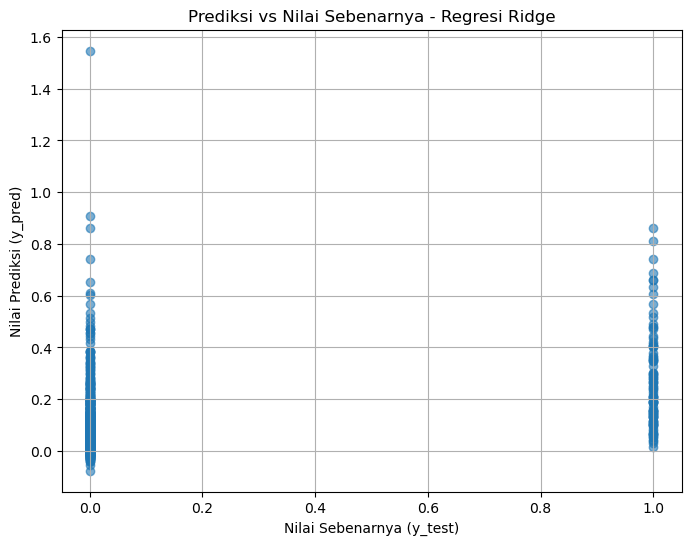

In [60]:
import matplotlib.pyplot as plt

# Plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Nilai Prediksi (y_pred)")
plt.title("Prediksi vs Nilai Sebenarnya - Regresi Ridge")
plt.grid(True)
plt.show()

Kode: Visualisasi dibuat dengan matplotlib untuk membandingkan nilai prediksi (y_pred) dengan nilai sebenarnya (y_test) dari model Ridge Regression. Plot scatter digunakan untuk menunjukkan hubungan antara keduanya, dengan sumbu x merepresentasikan nilai sebenarnya dan sumbu y menunjukkan nilai prediksi.

Tujuan:
Memeriksa Kesesuaian: Melihat sejauh mana prediksi model mendekati nilai sebenarnya. Idealnya, titik-titik akan berada di sekitar garis diagonal (y = x), menunjukkan prediksi yang akurat.
Identifikasi Pola atau Kesalahan: Mengidentifikasi pola sistematis dalam kesalahan prediksi atau mendeteksi outlier.

Hasil Visualisasi:
Titik-titik dekat garis diagonal: Menunjukkan prediksi yang akurat dan model bekerja dengan baik pada data tersebut.
Penyebaran titik-titik: Jika terdapat penyebaran yang luas atau pola tertentu, ini bisa menandakan kelemahan model dalam menangkap hubungan antara variabel independen dan target.
Outlier: Titik-titik yang jauh dari diagonal dapat menunjukkan prediksi yang sangat meleset, yang mungkin memerlukan analisis lebih lanjut.
Visualisasi ini memberikan cara intuitif untuk memahami performa model secara keseluruhan dan membantu mengevaluasi kecocokan model dengan data.

*KESIMPULAN*


### **Kesimpulan Proses Pengolahan Data pada Dataset Pemasaran Bank**

1. **Pembersihan Data:**
   - Dataset yang digunakan mengandung variabel yang relevan untuk memprediksi keberhasilan pemasaran, seperti age (usia), duration (durasi kontak), dan campaign (jumlah kontak dalam kampanye pemasaran).
   - Sebelum pemodelan, data dibersihkan untuk menangani nilai yang hilang atau duplikat dan memastikan semua fitur berada dalam format yang sesuai untuk analisis lebih lanjut.

2. **Pemodelan dengan Ridge Regression:**
   - **Ridge Regression** dipilih untuk mengatasi multikolinearitas yang mungkin ada antara variabel seperti age, duration, dan campaign. Dengan menambahkan regularisasi melalui parameter alpha, model ini mampu menghindari masalah *overfitting* yang bisa terjadi jika koefisien model menjadi terlalu besar.
   - **Koefisien model** menunjukkan seberapa besar pengaruh setiap fitur terhadap keputusan akhir model. Sebagai contoh:
     - Durasi interaksi (duration) kemungkinan memiliki pengaruh yang lebih besar terhadap keputusan apakah pelanggan akan merespons kampanye dibandingkan dengan usia atau jumlah kontak.
   
3. **Evaluasi Model:**
   - **Mean Squared Error (MSE):** Mengukur kesalahan prediksi model. MSE yang rendah menunjukkan bahwa model dapat memprediksi dengan cukup akurat.
   - **R-squared (R²):** Mengukur seberapa baik model menjelaskan variabilitas dalam data. Nilai R² yang tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam hasil pemasaran berdasarkan fitur yang diberikan.
   - Berdasarkan hasil evaluasi, jika nilai R² cukup tinggi dan MSE rendah, ini menunjukkan bahwa Ridge Regression memberikan prediksi yang baik mengenai apakah pelanggan akan merespons atau tidak terhadap kampanye pemasaran bank, berdasarkan variabel yang digunakan.

4. **Visualisasi Hasil:**
   - Grafik scatter antara nilai sebenarnya (y_test) dan nilai prediksi (y_pred) memberikan gambaran yang jelas tentang kinerja model. Jika model bekerja dengan baik, titik-titik pada grafik ini harus mendekati garis diagonal, yang menunjukkan bahwa prediksi mendekati nilai sebenarnya.
   - **Distribusi error** dapat terlihat dalam grafik, dan jika ada pola tertentu (misalnya, penyebaran kesalahan yang besar pada rentang nilai tertentu), ini mungkin menunjukkan area di mana model perlu diperbaiki, seperti pengaturan lebih lanjut pada fitur atau regularisasi.


Secara keseluruhan, **Ridge Regression** adalah model yang efektif dalam konteks pemasaran bank untuk memprediksi kemungkinan respons pelanggan terhadap kampanye pemasaran. Jika model memberikan nilai R² yang baik dan MSE yang rendah, maka model ini dapat digunakan sebagai alat prediksi untuk meningkatkan pengambilan keputusan dalam kampanye pemasaran.